In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

INPUT_FILE = "mushrooms.csv"

def load_data(file=INPUT_FILE, header=True):
    csv_path = os.path.join("", file)
    if header:
        return pd.read_csv(csv_path)
    else:
        return pd.read_csv(csv_path, header=None)


data = load_data(INPUT_FILE)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [3]:
datacopy = data.copy()

In [4]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

encoders = {}
binarizers = {}
for column in list(data):
    encoder = LabelEncoder()
    encoder.fit(data[column])
    binarizer = LabelBinarizer()
    binarizer.fit(data[column])
    data[column] = encoder.transform(data[column])
    encoders[column] = encoder
    binarizers[column] = binarizer

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


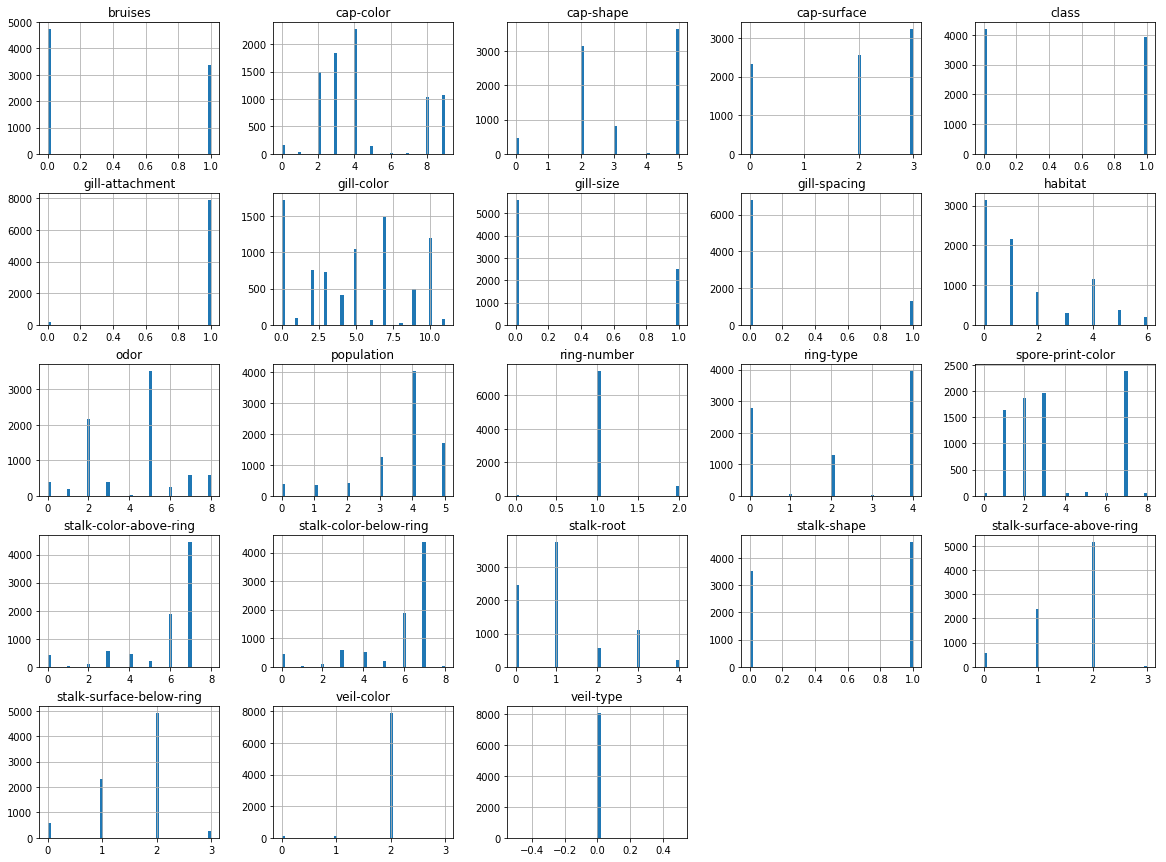

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
corr_features = data.corr()
corr_features["class"]

class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

In [8]:
columns_removed = []
columns_removed.append("veil-type")

In [9]:
data = datacopy.copy()

In [10]:
from sklearn .model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["class"]):
    train_features = data.loc[train_index]
    test_features = data.loc[test_index]
    
train_labels = train_features["class"].copy().values
train_features.drop("class", axis=1, inplace=True)

test_labels = test_features["class"].copy().values
test_features.drop("class", axis=1, inplace=True)

In [11]:
for set in (train_features, test_features):
    for column_removed in columns_removed:
        set.drop([column_removed], axis=1, inplace=True)

In [12]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 5249 to 2411
Data columns (total 21 columns):
cap-shape                   6499 non-null object
cap-surface                 6499 non-null object
cap-color                   6499 non-null object
bruises                     6499 non-null object
odor                        6499 non-null object
gill-attachment             6499 non-null object
gill-spacing                6499 non-null object
gill-size                   6499 non-null object
gill-color                  6499 non-null object
stalk-shape                 6499 non-null object
stalk-root                  6499 non-null object
stalk-surface-above-ring    6499 non-null object
stalk-surface-below-ring    6499 non-null object
stalk-color-above-ring      6499 non-null object
stalk-color-below-ring      6499 non-null object
veil-color                  6499 non-null object
ring-number                 6499 non-null object
ring-type                   6499 non-null object
spore-pr

In [13]:
import numpy as np

X = []
X_test = []
for column in list(train_features):
    if len(X) == 0:
        X = binarizers[column].transform(train_features[column])
        X_test = binarizers[column].transform(test_features[column])
        continue
        
    X = np.concatenate((X, binarizers[column].transform(train_features[column])), axis=1)
    X_test = np.concatenate((X_test, binarizers[column].transform(test_features[column])), axis=1)
    
Y = binarizers["class"].transform(train_labels).flatten()
Y_test = binarizers["class"].transform(test_labels).flatten()

In [14]:
print(np.shape(Y), np.shape(Y_test), np.shape(X), np.shape(X_test))

(6499,) (1625,) (6499, 111) (1625, 111)


In [15]:
from sklearn.decomposition import PCA
import numpy as np

def get_dims_variances(min_dim, max_dim, threshold=0.1, capToThreshold=False):
    dims = []
    variances = []
    optimum_dim = min_dim
    for dim in range(min_dim, max_dim):
        pca = PCA(n_components=dim)
        pca.fit(X)
        variance = np.array(pca.explained_variance_ratio_)
        variance = variance.min()
        if threshold < variance:
            optimum_dim = dim
            dims.append(dim)
            variances.append(variance)
        else:
            if capToThreshold:
                break
        
    return dims, variances, optimum_dim

23


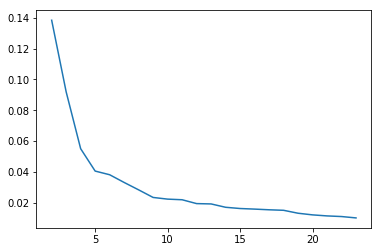

In [16]:
dims, variances, optimum_dim = get_dims_variances(2,  np.shape(X)[1], 0.01, capToThreshold=True)
print(optimum_dim)
import matplotlib.pyplot as plt
plt.plot(dims, variances)
plt.show()

In [17]:
print(variances)

[0.1383103486069508, 0.09191351304950753, 0.055092220882746575, 0.04059961237076332, 0.0382216251657648, 0.03322290740898192, 0.028425778227087733, 0.023507742490091438, 0.022422208875307967, 0.022018563506496596, 0.019523801628874463, 0.01930641110645749, 0.017141087632104625, 0.016341137031180127, 0.015957143794627166, 0.015517540411970001, 0.015184129960424411, 0.013283279622003125, 0.012218032513305927, 0.011549195653202483, 0.01113867128886284, 0.010249336164108499]


In [18]:
pca = PCA(n_components=optimum_dim)
pca.fit(X)
print(pca.explained_variance_ratio_)
X = pca.transform(X)
X_test = pca.transform(X_test)

[0.16188491 0.13831035 0.09191351 0.05509222 0.04059962 0.03822164
 0.03322293 0.02842691 0.02350955 0.02242325 0.02201855 0.01952805
 0.01933961 0.01717538 0.0163586  0.0160183  0.01554436 0.01520302
 0.0132878  0.0122408  0.01154081 0.01117127 0.01026622]


In [19]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(X)

X = imputer.transform(X)
X_test = imputer.transform(X_test)

In [20]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X)

X = scalar.transform(X)
X_test = scalar.transform(X_test)

In [21]:
print(Y)
print(binarizers["class"].classes_)

[1 0 0 ... 0 0 0]
['e' 'p']


In [22]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
def plot_roc_curve(clf_sets):
    for clf_set in clf_sets:
        y = clf_set[0]
        y_pred = clf_set[1]
        label = clf_set[2]
        fpr, tpr, thresholds = roc_curve(y, y_pred)
        plt.plot(fpr, tpr, linewidth=1, label=label)
    
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="bottom right")
    plt.show()

Cross Val Scores on training set
 [0.97784956 0.97968606 0.98014774]
confusion_matrix
 [[3293   73]
 [  62 3071]]
f1_score
 0.9784929106260952
precision_score
 0.9767811704834606
recall_score
 0.980210660708586


Cross Val Scores on testing set
 [0.96863469 0.95940959 0.96672828]
confusion_matrix
 [[794  48]
 [  9 774]]
f1_score
 0.9644859813084112
precision_score
 0.9416058394160584
recall_score
 0.9885057471264368


Accuracy on testing data set
 0.9661538461538461


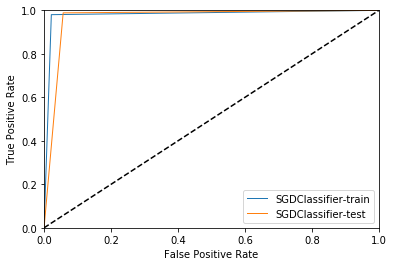

In [23]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.base import clone

clf_sets = []
sgd_clf = SGDClassifier(random_state=42)

print("Cross Val Scores on training set\n", cross_val_score(clone(sgd_clf), X, Y, cv=3, scoring="accuracy"))
Y_pred = cross_val_predict(clone(sgd_clf), X, Y, cv=3)
print("confusion_matrix\n", confusion_matrix(Y, Y_pred))
print("f1_score\n", f1_score(Y, Y_pred))
print("precision_score\n", precision_score(Y, Y_pred))
print("recall_score\n", recall_score(Y, Y_pred))
clf_sets.append((Y, Y_pred, "SGDClassifier-train"))

print("\n\nCross Val Scores on testing set\n", cross_val_score(clone(sgd_clf), X_test, Y_test, cv=3, scoring="accuracy"))
Y_test_pred = cross_val_predict(clone(sgd_clf), X_test, Y_test, cv=3)
print("confusion_matrix\n", confusion_matrix(Y_test, Y_test_pred))
print("f1_score\n", f1_score(Y_test, Y_test_pred))
print("precision_score\n", precision_score(Y_test, Y_test_pred))
print("recall_score\n", recall_score(Y_test, Y_test_pred))
clf_sets.append((Y_test, Y_test_pred, "SGDClassifier-test"))

sgd_clf.fit(X, Y)
print("\n\nAccuracy on testing data set\n", sum(Y_test == sgd_clf.predict(X_test)) / len(X_test))

plot_roc_curve(clf_sets)


Cross Val Scores on training set
 [0.99907707 1.         0.99815328]
confusion_matrix
 [[3362    4]
 [   2 3131]]
f1_score
 0.9990427568602426
precision_score
 0.9987240829346092
recall_score
 0.999361634216406


Cross Val Scores on testing set
 [1.         0.99630996 0.99445471]
confusion_matrix
 [[838   4]
 [  1 782]]
f1_score
 0.9968132568514977
precision_score
 0.9949109414758269
recall_score
 0.9987228607918263


Accuracy on testing data set
 1.0


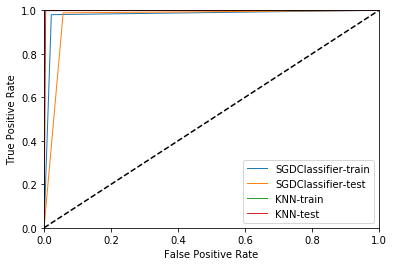

In [24]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier 

knn_clf = KNeighborsClassifier()
print("Cross Val Scores on training set\n", cross_val_score(clone(knn_clf), X, Y, cv=3, scoring="accuracy"))
Y_pred = cross_val_predict(clone(knn_clf), X, Y, cv=3)
print("confusion_matrix\n", confusion_matrix(Y, Y_pred))
print("f1_score\n", f1_score(Y, Y_pred))
print("precision_score\n", precision_score(Y, Y_pred))
print("recall_score\n", recall_score(Y, Y_pred))
clf_sets.append((Y, Y_pred, "KNN-train"))

print("\n\nCross Val Scores on testing set\n", cross_val_score(clone(knn_clf), X_test, Y_test, cv=3, scoring="accuracy"))
Y_test_pred = cross_val_predict(clone(knn_clf), X_test, Y_test, cv=3)
print("confusion_matrix\n", confusion_matrix(Y_test, Y_test_pred))
print("f1_score\n", f1_score(Y_test, Y_test_pred))
print("precision_score\n", precision_score(Y_test, Y_test_pred))
print("recall_score\n", recall_score(Y_test, Y_test_pred))
clf_sets.append((Y_test, Y_test_pred, "KNN-test"))

knn_clf.fit(X, Y)
print("\n\nAccuracy on testing data set\n", sum(Y_test == knn_clf.predict(X_test)) / len(X_test))

plot_roc_curve(clf_sets)


Cross Val Scores on training set
 [0.99815413 0.99815328 0.99861496]
confusion_matrix
 [[3361    5]
 [   6 3127]]
f1_score
 0.9982442138866721
precision_score
 0.9984035759897829
recall_score
 0.998084902649218


Cross Val Scores on testing set
 [0.99261993 0.99077491 0.98890943]
confusion_matrix
 [[840   2]
 [ 13 770]]
f1_score
 0.990353697749196
precision_score
 0.9974093264248705
recall_score
 0.9833971902937421


Accuracy on testing data set
 0.9987692307692307


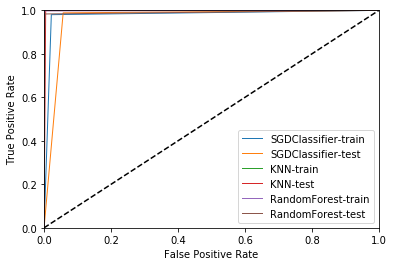

In [25]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier 

forest_clf = RandomForestClassifier(random_state=42)
print("Cross Val Scores on training set\n", cross_val_score(clone(forest_clf), X, Y, cv=3, scoring="accuracy"))
Y_pred = cross_val_predict(clone(forest_clf), X, Y, cv=3)
print("confusion_matrix\n", confusion_matrix(Y, Y_pred))
print("f1_score\n", f1_score(Y, Y_pred))
print("precision_score\n", precision_score(Y, Y_pred))
print("recall_score\n", recall_score(Y, Y_pred))
clf_sets.append((Y, Y_pred, "RandomForest-train"))

print("\n\nCross Val Scores on testing set\n", cross_val_score(clone(forest_clf), X_test, Y_test, cv=3, scoring="accuracy"))
Y_test_pred = cross_val_predict(clone(forest_clf), X_test, Y_test, cv=3)
print("confusion_matrix\n", confusion_matrix(Y_test, Y_test_pred))
print("f1_score\n", f1_score(Y_test, Y_test_pred))
print("precision_score\n", precision_score(Y_test, Y_test_pred))
print("recall_score\n", recall_score(Y_test, Y_test_pred))
clf_sets.append((Y_test, Y_test_pred, "RandomForest-test"))

forest_clf.fit(X, Y)
print("\n\nAccuracy on testing data set\n", sum(Y_test == forest_clf.predict(X_test)) / len(X_test))

plot_roc_curve(clf_sets)
